In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('ML_Data_48.csv')

In [4]:
data

,label,X_min,X_max,X_range,X_mean,X_rms,X_std,Y_min,Y_max,Y_range,...,total_jerk_max,total_jerk_range,total_jerk_mean,total_jerk_rms,total_jerk_std,timestamp_range,SMA,X_entropy,Y_entropy,Z_entropy
0,3,-1.004375,0.138634,1.143009,-0.271257,0.367041,0.248950,-1.232137,0.086563,1.318700,...,27.094139,62.089663,-1.106926,13.783655,13.832920,0.803,1.369201,4.304065,4.304065,4.304065
1,3,-0.990767,0.127101,1.117868,-0.423896,0.505179,0.276519,-1.185982,0.093986,1.279967,...,47.307691,92.645395,-0.212084,16.781165,16.884373,0.880,1.388977,4.394449,4.394449,4.394449
2,3,-0.720209,0.214299,0.934508,-0.271104,0.341752,0.209499,-1.566424,0.114125,1.680549,...,37.832124,68.786930,1.058925,13.647771,13.699507,0.803,1.328170,4.304065,4.304065,4.304065
3,3,-0.496083,0.153754,0.649837,-0.224294,0.278918,0.167294,-0.711852,0.049919,0.761771,...,11.633259,26.671029,-0.374330,6.356843,6.403241,0.605,1.012029,4.025352,4.025352,4.025352
4,3,-0.861475,0.202574,1.064049,-0.318783,0.396607,0.237407,-0.897966,0.092182,0.990147,...,37.477062,76.144662,0.080205,11.699858,11.771581,0.891,1.358557,4.406719,4.406719,4.406719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,5,-0.834887,1.088238,1.923125,-0.198314,0.477376,0.437464,-1.312318,0.126992,1.439310,...,20.799001,44.680255,-0.099162,8.639718,8.703382,0.737,1.421095,4.219508,4.219508,4.219508
3731,5,-1.592273,0.800989,2.393262,-0.223964,0.589055,0.549660,-1.284093,0.101797,1.385890,...,21.099744,48.572448,0.986131,11.553537,11.613701,0.616,1.625090,4.043051,4.043051,4.043051
3732,5,-1.145478,0.834240,1.979718,-0.288274,0.501753,0.413404,-1.466980,0.148195,1.615175,...,54.160332,97.919308,0.538583,16.613627,16.715227,0.825,1.590152,4.330733,4.330733,4.330733
3733,5,-0.828272,0.844807,1.673079,-0.121973,0.453033,0.439700,-1.333032,0.172730,1.505761,...,26.624261,44.020802,0.045035,8.635763,8.702850,0.704,1.435703,4.174387,4.174387,4.174387


In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train.shape, x_test.shape

((3174, 47), (561, 47))

In [7]:
scaled=StandardScaler()
x_train_s=scaled.fit_transform(x_train)
x_test_s=scaled.fit_transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score

# Random Forest Classifier

In [9]:
model=RandomForestClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

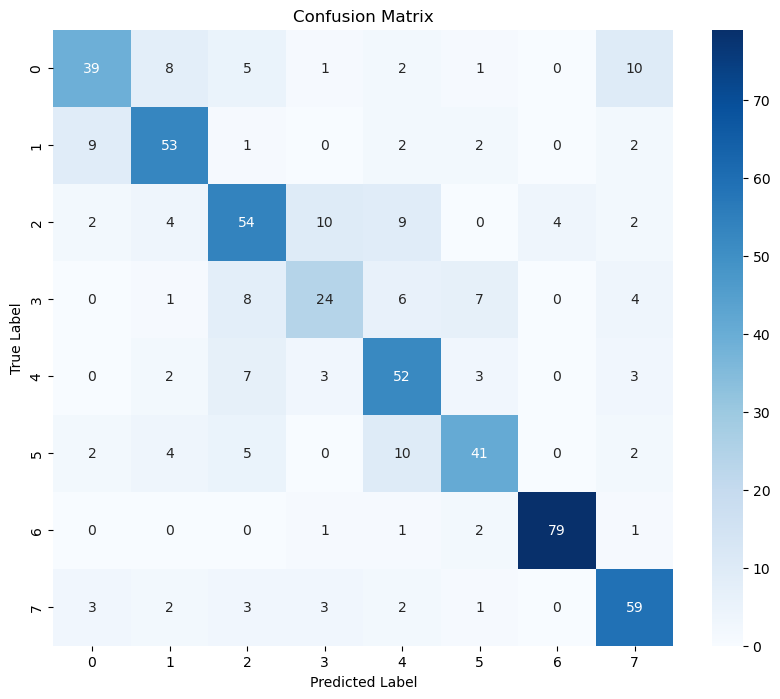

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64        66
           1       0.72      0.77      0.74        69
           2       0.65      0.64      0.64        85
           3       0.57      0.48      0.52        50
           4       0.62      0.74      0.68        70
           5       0.72      0.64      0.68        64
           6       0.95      0.94      0.95        84
           7       0.71      0.81      0.76        73

    accuracy                           0.71       561
   macro avg       0.71      0.70      0.70       561
weighted avg       0.72      0.71      0.71       561



In [10]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

In [12]:
import joblib

In [13]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Gradient Boosting

In [14]:
model=GradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9609325771896661

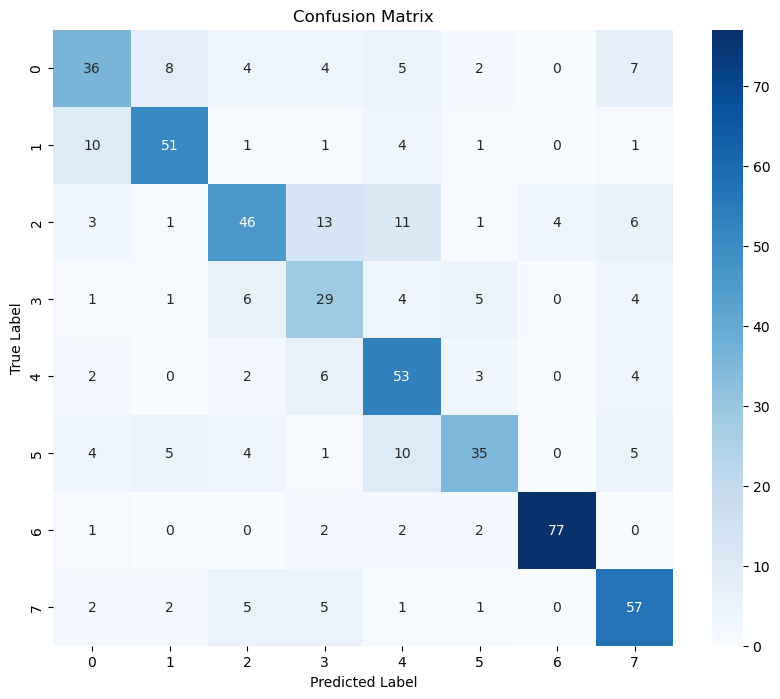

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58        66
           1       0.75      0.74      0.74        69
           2       0.68      0.54      0.60        85
           3       0.48      0.58      0.52        50
           4       0.59      0.76      0.66        70
           5       0.70      0.55      0.61        64
           6       0.95      0.92      0.93        84
           7       0.68      0.78      0.73        73

    accuracy                           0.68       561
   macro avg       0.68      0.68      0.67       561
weighted avg       0.69      0.68      0.68       561



In [15]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# LGBM

In [16]:
model=LGBMClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11505
[LightGBM] [Info] Number of data points in the train set: 3174, number of used features: 47
[LightGBM] [Info] Start training from score -2.149245
[LightGBM] [Info] Start training from score -2.216309
[LightGBM] [Info] Start training from score -2.032063
[LightGBM] [Info] Start training from score -2.307006
[LightGBM] [Info] Start training from score -1.806998
[LightGBM] [Info] Start training from score -2.242665
[LightGBM] [Info] Start training from score -1.870385
[LightGBM] [Info] Start training from score -2.125212


0.9955891619407687

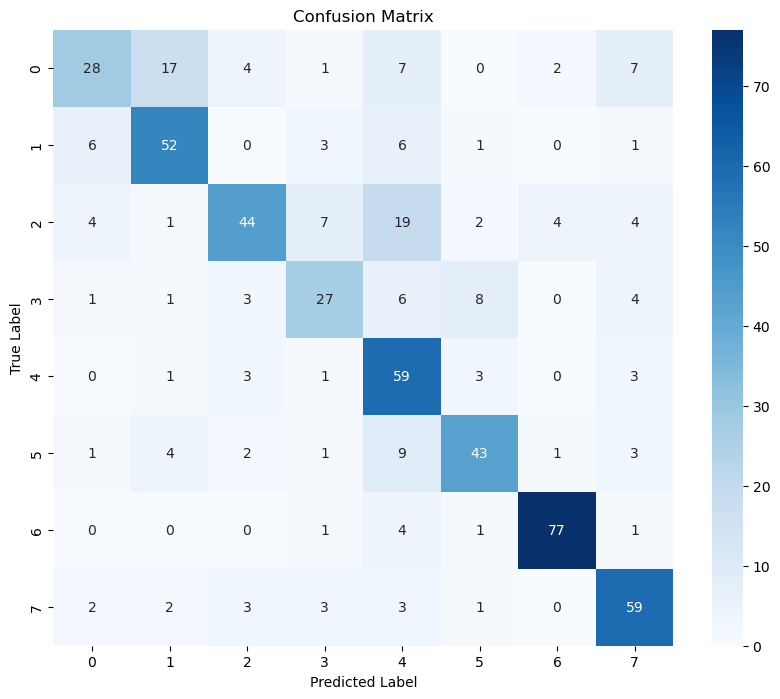

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        66
           1       0.67      0.75      0.71        69
           2       0.75      0.52      0.61        85
           3       0.61      0.54      0.57        50
           4       0.52      0.84      0.64        70
           5       0.73      0.67      0.70        64
           6       0.92      0.92      0.92        84
           7       0.72      0.81      0.76        73

    accuracy                           0.69       561
   macro avg       0.70      0.68      0.68       561
weighted avg       0.71      0.69      0.69       561



In [17]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# XGBoost

In [18]:
model=XGBClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

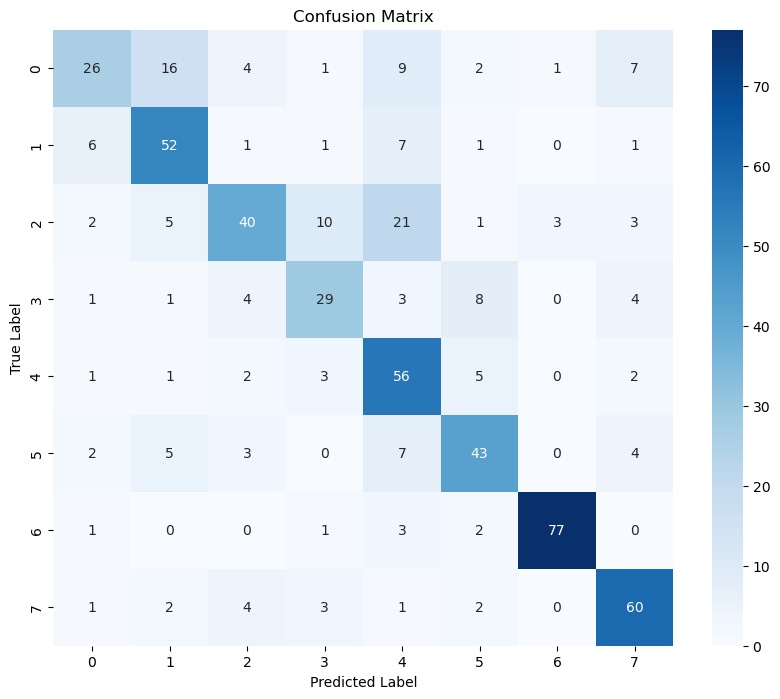

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        66
           1       0.63      0.75      0.69        69
           2       0.69      0.47      0.56        85
           3       0.60      0.58      0.59        50
           4       0.52      0.80      0.63        70
           5       0.67      0.67      0.67        64
           6       0.95      0.92      0.93        84
           7       0.74      0.82      0.78        73

    accuracy                           0.68       561
   macro avg       0.68      0.68      0.67       561
weighted avg       0.69      0.68      0.68       561



In [19]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

In [22]:
model.save_model('xgb.bin')

/home/ettexham/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:01:35] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


# HistGradient Boosting

In [17]:
model=HistGradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

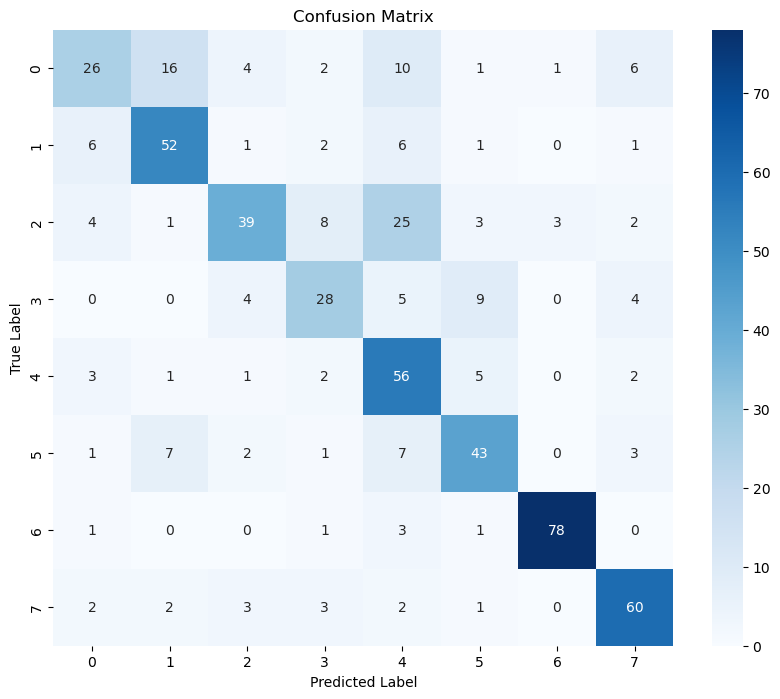

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.39      0.48        66
           1       0.66      0.75      0.70        69
           2       0.72      0.46      0.56        85
           3       0.60      0.56      0.58        50
           4       0.49      0.80      0.61        70
           5       0.67      0.67      0.67        64
           6       0.95      0.93      0.94        84
           7       0.77      0.82      0.79        73

    accuracy                           0.68       561
   macro avg       0.68      0.67      0.67       561
weighted avg       0.70      0.68      0.68       561



In [18]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)